In [1]:
import os
import pickle

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import umap


if not os.path.exists("Figures"):
    os.mkdir("Figures")


def plot_umap_categorical(feature, data, save_as=None, dpi=600, alpha=0.6, s=3):
    # Identify the top 10 most frequent categories (excluding NaN)
    top_categories = data[feature].value_counts().nlargest(10).index
    # Only replace categories not in the top 10 and not NaN with "Other"
    data[f"{feature}_top_categories"] = data[feature].apply(
        lambda x: x if x in top_categories or pd.isna(x) else "Other"
    )
    # Set categorical order by frequency (most frequent first)
    category_counts = data[f"{feature}_top_categories"].value_counts()
    data[f"{feature}_top_categories"] = pd.Categorical(
        data[f"{feature}_top_categories"],
        categories=category_counts.index.tolist(),
        ordered=True
    )

    # Create the plot
    plt.figure(figsize=(7, 6))
    scatter = sns.scatterplot(
        x="UMAP1",
        y="UMAP2",
        hue=f"{feature}_top_categories",
        data=data,
        palette="tab20",
        alpha=alpha,
        s=s,
        edgecolor="none",
    )
    plt.title(f"UMAP of Sample Embeddings Colored by Top 10 {feature}")
    plt.xlabel("UMAP Component 1")
    plt.ylabel("UMAP Component 2")
    
    # Modify legend
    plt.legend(title=feature, bbox_to_anchor=(1.05, 1), loc="upper left", markerscale=3)
    
    # Save the plot
    if save_as:
        plt.savefig(save_as, bbox_inches="tight", dpi=dpi)
    plt.show()


# Function to plot UMAP with a numerical feature
def plot_umap_numerical(feature, data, save_as=None, dpi=600, alpha=0.6, s=3):
    # Convert to numeric and handle NA/N/A
    data[feature] = pd.to_numeric(data[feature], errors="coerce")

    # Create the plot
    plt.figure(figsize=(7, 6))
    plt.scatter(
        data["UMAP1"],
        data["UMAP2"],
        c=data[feature],
        cmap="viridis",
        alpha=alpha,
        s=s,
        edgecolor="none",
    )
    plt.colorbar(label=feature)
    plt.title(f"UMAP of Sample Embeddings Colored by {feature}")
    plt.xlabel("UMAP Component 1")
    plt.ylabel("UMAP Component 2")

    # Save the plot
    if save_as:
        plt.savefig(save_as, bbox_inches="tight", dpi=dpi)
    plt.show()


/Users/chan/Projects/MethylGPT/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Read all metadata
metadata_path = "metadata/gpt-4-1106-preview_output"
column_names = [
    "GSM_ID",
    "PATIENT_ID",
    "race",
    "sex",
    "age",
    "genetic_info",
    "disease",
    "tissue",
    "cell_line",
    "vivo_vitro",
    "case_control",
    "group_name",
    "treatment",
    "perturbation_category",
]

# Initialize an empty DataFrame to hold all data
dataframes = []  # List to hold individual dataframes

# Iterate over each file in the directory
for filename in os.listdir(metadata_path):
    if filename.endswith(".dsv"):
        file_path = os.path.join(metadata_path, filename)
        # Read the file and add it to the list
        df = pd.read_csv(file_path, sep="|", names=column_names, header=None)
        dataframes.append(df)

# Concatenate all dataframes in the list into a single dataframe
compiled_data = pd.concat(dataframes, ignore_index=True)
# compiled_data = compiled_data[compiled_data["tissue"] != "NA"]

write_path = "compiled_metadata.csv.gz"
compiled_data.to_csv(write_path, index=False, compression="gzip")
compiled_data = pd.read_csv("compiled_metadata.csv.gz")

/var/folders/95/kt4r699n6554_fwxs6gnlvc00000gq/T/ipykernel_74954/861051432.py:37: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  compiled_data = pd.read_csv("compiled_metadata.csv.gz")


In [3]:
compiled_data

,GSM_ID,PATIENT_ID,race,sex,age,genetic_info,disease,tissue,cell_line,vivo_vitro,case_control,group_name,treatment,perturbation_category
0,GSM1415656,NaN,Asian,M,NaN,NaN,Healthy,Other,NaN,in_vivo,ctrl,Normal_Epithelium_1,NaN,NaN
1,GSM1415657,NaN,Asian,M,NaN,NaN,Healthy,Other,NaN,in_vivo,ctrl,Normal_Epithelium_2,NaN,NaN
2,GSM1415658,NaN,Asian,M,NaN,NaN,Healthy,Other,NaN,in_vivo,ctrl,Normal_Epithelium_3,NaN,NaN
3,GSM1415659,NaN,Asian,F,NaN,NaN,Head and Neck Squamous Cell Carcinoma,Other,NaN,in_vivo,case,Neoplastic_Epithelium_1,NaN,Disease
4,GSM1415660,NaN,Asian,F,NaN,NaN,Head and Neck Squamous Cell Carcinoma,Other,NaN,in_vivo,case,Neoplastic_Epithelium_2,NaN,Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199399,GSM801926,NaN,NaN,NaN,51.0,NaN,Breast Cancer,Whole Blood,NaN,in_vivo,ctrl,BRCA1_WT_Cancer,NaN,Disease
199400,GSM801927,NaN,NaN,NaN,51.0,NaN,Healthy,Whole Blood,NaN,in_vivo,case,BRCA1_WT_Healthy,NaN,NaN
199401,GSM801928,NaN,NaN,NaN,57.0,NaN,Breast Cancer,Whole Blood,NaN,in_vivo,ctrl,BRCA1_Mut_Cancer,NaN,Disease
199402,GSM801929,NaN,NaN,NaN,68.0,NaN,Breast Cancer,Whole Blood,NaN,in_vivo,ctrl,BRCA1_WT_Cancer,NaN,Disease


In [4]:
# Read the valid_cell_emb.pt pickle file
with open("Embeddings/cell_emb.pt", "rb") as f:
    valid_cell_emb = pickle.load(f)

# Run UMAP on valid_cell_emb: 3200*64 -> 3200*2
valid_cell_emb_np = valid_cell_emb["cell_emb"]
valid_umap_model = umap.UMAP(n_components=2, random_state=42)
valid_umap_emb = valid_umap_model.fit_transform(valid_cell_emb_np)
cell_list = valid_cell_emb["cell_list"]
umap_emb = valid_umap_emb

# Create a DataFrame for UMAP embeddings
cell_emb_df = pd.DataFrame(umap_emb, index=cell_list)
cell_emb_df.reset_index(inplace=True)
cell_emb_df.columns = ["GSM_ID", "UMAP1", "UMAP2"]

merged_data = pd.merge(compiled_data, cell_emb_df, on="GSM_ID")
merged_data["numeric_gsm"] = merged_data["GSM_ID"].apply(lambda x: int(x[3:]))

/Users/chan/Projects/MethylGPT/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/chan/Projects/MethylGPT/.venv/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [9]:
print(valid_cell_emb_np, valid_cell_emb_np.shape)
print(cell_list, cell_list.shape)

[[ 0.006973  -0.008965  -0.012474  ...  0.00677   -0.01715   -0.010574 ]
 [ 0.00624   -0.0131    -0.0277    ...  0.00881   -0.014565  -0.01131  ]
 [ 0.002247  -0.01807   -0.01872   ...  0.007282  -0.006485  -0.01665  ]
 ...
 [ 0.01301   -0.01811   -0.06104   ...  0.03091   -0.00817    0.01733  ]
 [ 0.013     -0.0369    -0.0001616 ...  0.03226    0.004898  -0.003593 ]
 [ 0.01901   -0.02238   -0.01185   ...  0.0487    -0.01353    0.02005  ]] (3200, 64)
['TWPID10048' 'TWPID10103' 'TWPID11896' ... 'GSM5919000' 'GSM5919069'
 'GSM5919134'] (3200,)


In [5]:
cell_emb_df

,GSM_ID,UMAP1,UMAP2
0,TWPID10048,13.491685,-3.589967
1,TWPID10103,13.484050,-3.560254
2,TWPID11896,13.472520,-3.394228
3,TWPID12578,13.449640,-3.595559
4,TWPID12792,13.493480,-3.587457
...,...,...,...
3195,GSM5918945,8.046478,-7.294732
3196,GSM5918951,8.074848,-7.256872
3197,GSM5919000,9.944282,-4.332743
3198,GSM5919069,12.493241,-3.165973


In [6]:
merged_data

,GSM_ID,PATIENT_ID,race,sex,age,genetic_info,disease,tissue,cell_line,vivo_vitro,case_control,group_name,treatment,perturbation_category,UMAP1,UMAP2,numeric_gsm
0,GSM3884856,NaN,NaN,F,NaN,NaN,Glioblastoma,NaN,NaN,in_vivo,NaN,NaN,NaN,Disease,15.187570,0.531917,3884856
1,GSM4579318,113,Hispanic and Latino,F,19,NaN,NaN,Cells,NaN,in_vivo,NaN,NaN,Hydrocodone,Small Molecule,-2.807792,1.838315,4579318
2,GSM4579367,140,Black,M,41,NaN,NaN,Cells,NaN,in_vivo,NaN,NaN,NaN,NaN,-2.711196,1.824332,4579367
3,GSM4211044,NaN,Asian,F,20,NaN,Healthy,Whole Blood,NaN,in_vivo,NaN,NaN,NaN,NaN,-7.604105,3.291692,4211044
4,GSM5725429,NaN,White,M,66,NaN,Mild Cognitive Impairment,Whole Blood,NaN,in_vivo,case,baseline,NaN,Disease,-1.961427,3.393625,5725429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,GSM3532611,PASUHK,NaN,F,1.5,NaN,Acute Myeloid Leukemia,Other,NaN,in_vivo,case,NaN,NaN,Disease,12.441356,11.067636,3532611
2554,GSM3532444,PARGMH,NaN,F,18.12,NaN,Acute Myeloid Leukemia,Whole Blood,NaN,in_vivo,case,NaN,NaN,Disease,12.072488,11.280970,3532444
2555,GSM4322241,Donor 1,NaN,NaN,NaN,NaN,Healthy,Adipose,NaN,in_vitro,ctrl,Protocol 3,Neu3,NaN,12.372976,-3.322539,4322241
2556,GSM2861664,NaN,NaN,M,88.0,NaN,Atherosclerosis,Whole Blood,NaN,in_vivo,case,NaN,NaN,Disease,-2.505099,1.714535,2861664


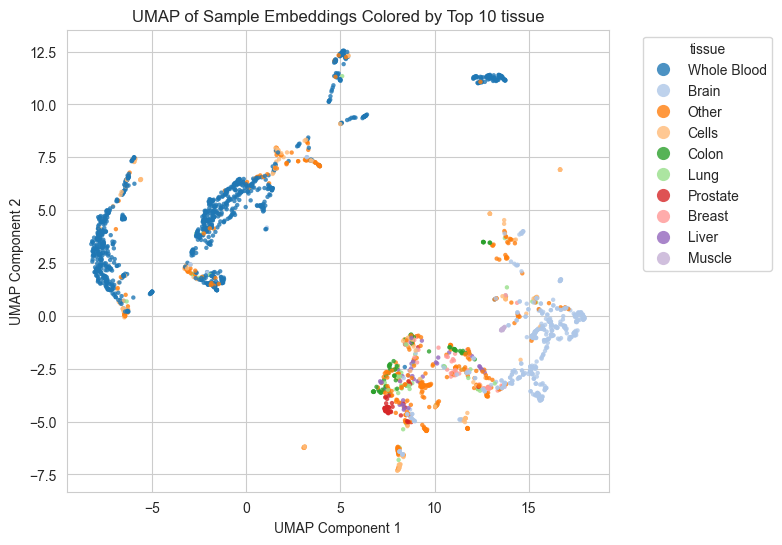

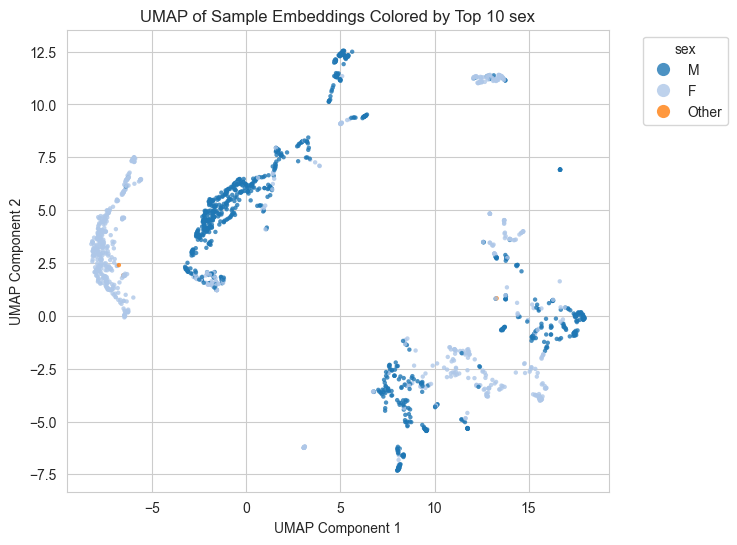

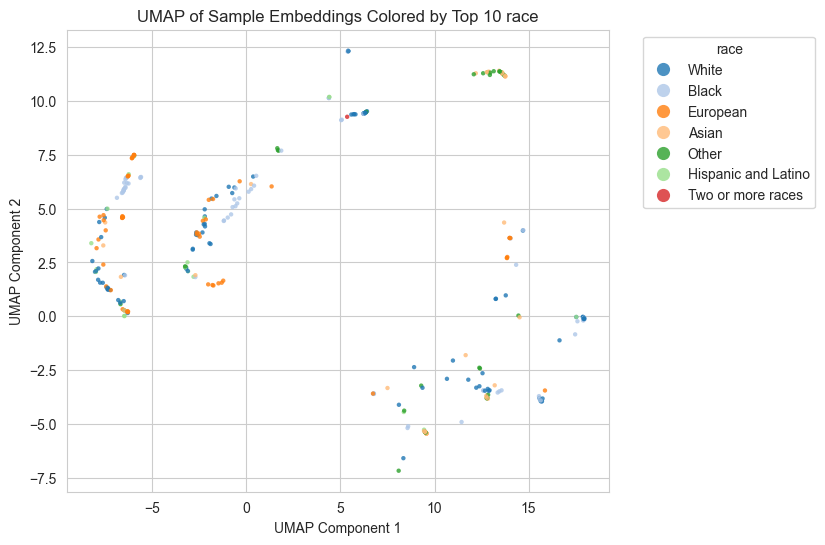

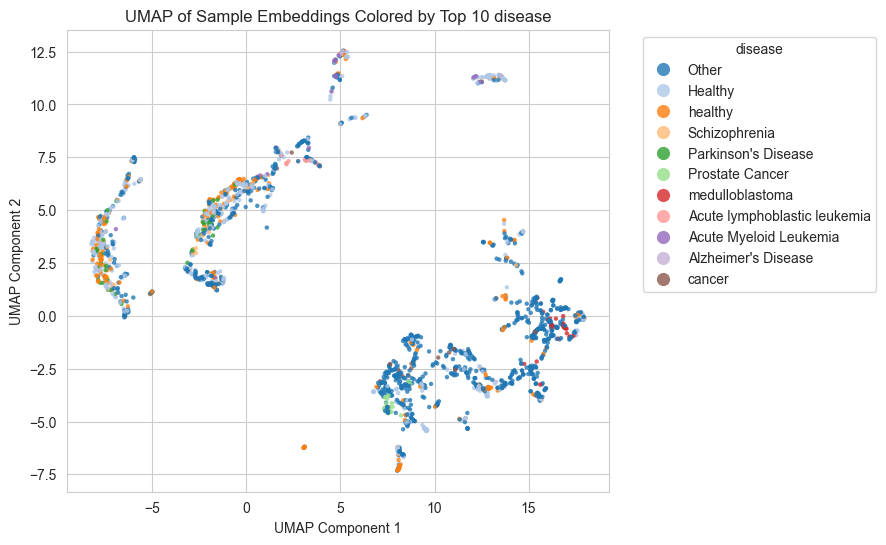

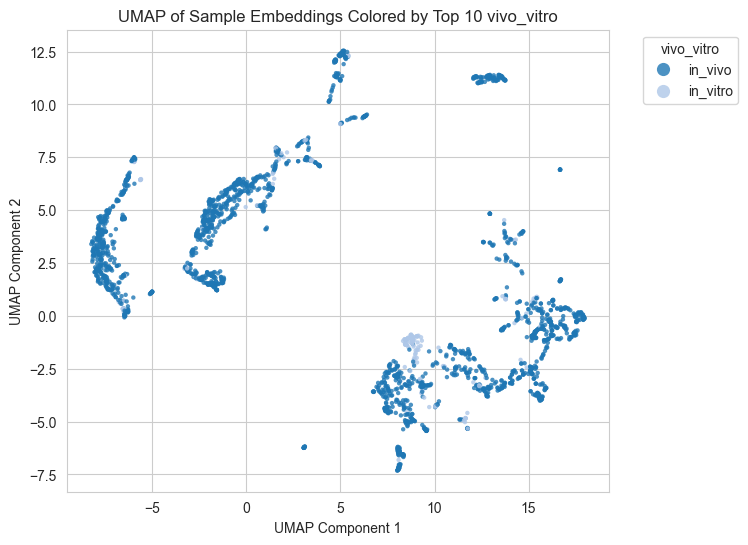

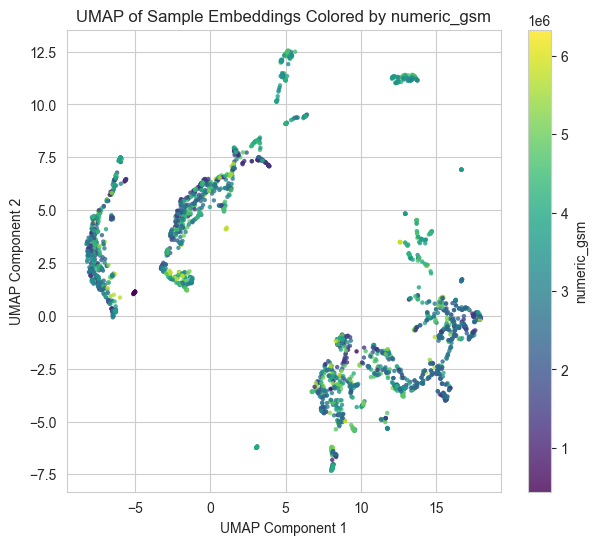

In [6]:
plot_umap_categorical(
    "tissue",
    merged_data,
    save_as="Figures/embeding_tissue_Aug29-11-38.png",
    s=10,
    alpha=0.8,
)

plot_umap_categorical(
    "sex",
    merged_data,
    save_as="Figures/embeding_sex_Aug29-11-38.png",
    s=10,
    alpha=0.8,
)

plot_umap_categorical(
    "race",
    merged_data,
    save_as="Figures/embeding_race_Aug29-11-38.png",
    s=10,
    alpha=0.8,
)

plot_umap_categorical(
    "disease",
    merged_data,
    save_as="Figures/embeding_disease_Aug29-11-38.png",
    s=10,
    alpha=0.8,
)

plot_umap_categorical(
    "vivo_vitro",
    merged_data,
    save_as="Figures/embeding_vivo_vitro_Aug29-11-38.png",
    s=10,
    alpha=0.8,
)

plot_umap_numerical(
    "numeric_gsm",
    merged_data,
    save_as="Figures/embeding_numeric_gsm_Aug29-11-38.png",
    s=10,
    alpha=0.8,
)

In [4]:
 '''

## for training set

with open("results/embeddings/train_cell_emb.pt", "rb") as f:
    train_cell_emb = pickle.load(f)

# Run UMAP on train_cell_emb
train_cell_emb_np = train_cell_emb["cell_emb"]
train_umap_model = umap.UMAP(n_neighbors = 100, n_components=2, random_state=42)
train_umap_emb = train_umap_model.fit_transform(train_cell_emb_np)
cell_list = train_cell_emb["cell_list"]
umap_emb = train_umap_emb

cell_emb_df = pd.DataFrame(umap_emb, index=cell_list)
# colums = ["UMAP1", "UMAP2"]
cell_emb_df.reset_index(inplace=True)
# set column name to GSM_ID, UMAP1, UMAP2
cell_emb_df.columns = ["GSM_ID", "UMAP1", "UMAP2"]

merged_data = pd.merge(compiled_data, cell_emb_df, on="GSM_ID")


plot_umap_categorical(
    "disease",
    merged_data,
    save_as="figures/embeding_disease_train_Aug29-11-38.png",
)

plot_umap_categorical(
    "tissue",
    merged_data,
    save_as="figures/embeding_tissue_train_Aug29-11-38.png",
)'''

'\n\n## for training set\n\nwith open("results/embeddings/train_cell_emb.pt", "rb") as f:\n    train_cell_emb = pickle.load(f)\n\n# Run UMAP on train_cell_emb\ntrain_cell_emb_np = train_cell_emb["cell_emb"]\ntrain_umap_model = umap.UMAP(n_neighbors = 100, n_components=2, random_state=42)\ntrain_umap_emb = train_umap_model.fit_transform(train_cell_emb_np)\ncell_list = train_cell_emb["cell_list"]\numap_emb = train_umap_emb\n\ncell_emb_df = pd.DataFrame(umap_emb, index=cell_list)\n# colums = ["UMAP1", "UMAP2"]\ncell_emb_df.reset_index(inplace=True)\n# set column name to GSM_ID, UMAP1, UMAP2\ncell_emb_df.columns = ["GSM_ID", "UMAP1", "UMAP2"]\n\nmerged_data = pd.merge(compiled_data, cell_emb_df, on="GSM_ID")\n\n\nplot_umap_categorical(\n    "disease",\n    merged_data,\n    save_as="figures/embeding_disease_train_Aug29-11-38.png",\n)\n\nplot_umap_categorical(\n    "tissue",\n    merged_data,\n    save_as="figures/embeding_tissue_train_Aug29-11-38.png",\n)'